<a href="https://colab.research.google.com/github/aaoiii/2023-2-ESAA/blob/main/5%EC%A3%BC%EC%B0%A8_%ED%8C%8C%EB%A8%B8%EC%99%84_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chap3. 평가**

회귀: 실제값과 오차값의 오차 평균값

분류의 성능 평가 지표:
- 정확도
- 오차행렬
- 정밀도
- 재현율
- F1 스코어
- ROC AUC



**1. 정확도(Accuracy)**
정확도 = 예측결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
- 모델 예측 성능을 나타내는 평가 지표


In [5]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
  #fit 메서드는 아무것도 학습하지 않음
  def fit(self,X,y=None):
    pass
  #predict()메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
  def predict(self,X):
    pred=np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i]==1:
        pred[i]=0
      else:
        pred[i]=1
    return pred

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#원본데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할

#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df=pd.read_csv('train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)

In [8]:
#위에서 생성한 Dummy Classifier을 이용해 학습/예측/평가 수행
myclf=MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions=myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [9]:
#mnist 데이터세트

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self,X,y):
    pass

  #입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

#사이킷런의 내장 데이터 세트인 load_digis()를 이용해 MNIST 데이터 로딩
digits=load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로변환, 7번이 아니면 False이고 0으로 반환.
y=(digits.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)

In [10]:
#불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기:',y_test.shape)
print('테스트 세트 레이블 0과1의분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier 로 학습/예측/정확도 평가
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도:{:3f}.format(accuracy_score(y_test,fakepred))')

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과1의분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도:{:3f}.format(accuracy_score(y_test,fakepred))


- 정확도 평가 지표는 불균형한 레이블 데이터 세트에서 성능 수치로 이용되면 안된다.

=> 오차행렬(confusion matrix)

# **2. 오차행렬**

이진분류의 예측 오류가 얼마인지, 어떠한 유형의 예측 오류가 발생하고 있는지 나타내는 지표

- 열: 실제 클래스
- 행: 예측 클래스(predicted)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fakepred)

#MyFakeClassifier에서 target==7에 대해 이진분류한 데이터 이용한 것

array([[405,   0],
       [ 45,   0]])

- 정확도=예측 결과와 실제 값이 동일한 건수/전체 데이터 수
- 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 중점적으로 찾아야하는 매우 적은 수의 결과값에 1 부여, 아닌 경우에 0(negative) 부여하는 경우 많음
- negative로 예측 정확도가 높아지는 경향이 발생

=> 불균형한 데이터 세트에서는 정확도보다는 정밀도와 재현율 사용!

# **3. 정밀도와 재현율**

정밀도= TP/(FP+TP)
재현율= TP/(RN+TP)



- 정밀도: 예측을 positive으로 한 대상 중에 예측과 실제 값이 positive로 일치한 데이터의 비율

분모 (FP+TP) => 예측을 positive로 한 모든 데이터 건수

분자 TP => 예측과 실제값이 positive 로 일치한 데이터 건수




- 재현율(민감도, TPR): 실제 값이 positive인 대상 중에 예측과 실제 값이 positive로 일치한 데이터의 비율

분모 (FN+TP) => 실제 값이 positive인 모든 데이터 개수

분자 TP => 예측과 실제 값이 positive로 일치한 데이터 건수

재현율이 중요 지표일 때 : 실제 positive 양성 데이터를 negative로 잘못 판단하게 되면 큰 영향이 발생하는 경우

ex) 암 판단 모델, 금융 사기 적발 모델

정밀도가 중요 지표일 때 : 실제 negative 음성인 데이터 예측을 positive 양성으로 잘못 판단하면 큰 영향이 발생하는 경우

ex) 스팸메일 여부를 판단하는 모델

재현율 : 실제 positive, 예측 negative을 낮추려함

정밀도 : FP를 낮추려함

=> 재현율과 정밀도 모두 높은 수치를 얻는 것이 best

정밀도 계산 : precision_score()

재현율 계산 : recall_score()

In [12]:
#confusion matrix, accuracy, precision, recall 등의 평가를 한번에 호출하는 get_clf_eval() 함수
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.f}.format(accuracy,precision_call)')

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할.
titanic_df=pd.read_csv('train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
lr_clf=LogisticRegression()

lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)








오차 행렬
[[104  14]
 [ 13  48]]
정확도: {0:.4f}, 정밀도: {1:.f}.format(accuracy,precision_call)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **정밀도/재현율 트레이드오프**

- 분류의 결정 임곗값(threshold)조정하여 정밀도 또는 재현율의 수치를 높일 수 있다.

- 정밀도와 재현율은 상호 보완적인 평가 지표
=> trade-off

<사이킷런의 분류 알고리즘>

1. 예측데이터가 특정 레이블에 속하는지 계산하기 위해 개별 레이블별로 결정 확률 구함

2. 예측 확률이 큰 레이블 값으로 예측

<이진 분류 모델>
임곗값을 0.5, 50% 로 정하고 기준보다 크면 positive, 작으면 negative

- predict_proba() : 개별 데이터별로 예측 확률 반환
- predict()와 유사, but 반환 결과가 예측 확률 결과임
- 입력 파라미터 : 테스트 데이터 피처 데이터 세트
- 반환값 : 개별 클래스의 예측 확률을 ndarray mxn
- 각열의 개별 클래스의 예측 확률 (이진분류에서는 첫번째 칼럼은 0 negative 확률, 두번째 칼럼은 1 positive 확률)

In [18]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:',pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concentration)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n',pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46197474 0.53802526]
 [0.87872398 0.12127602]
 [0.87719492 0.12280508]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.46197474 0.53802526 1.        ]
 [0.87872398 0.12127602 0.        ]
 [0.87719492 0.12280508 0.        ]]


0과1에 대한 확률을 나타내므로 첫번째 칼러모가 두번째 칼럼을 더하면 1이 된다.

In [19]:
#binarizer 클래스 이용
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],[2,0,0],[0,1.1,1.2]]

#X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


Binarizer의 threshold 값이 1.1보다 작거나 같으면 0, 크면 1 반환

In [20]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold=0.5

#predict_proba() 반환값의 두번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: {0:.4f}, 정밀도: {1:.f}.format(accuracy,precision_call)


In [22]:
#Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: {0:.4f}, 정밀도: {1:.f}.format(accuracy,precision_call)


- 임곗값을 낮추니 재현율이 올라가고 정밀도가 떨어짐
- 분류결정임곗값은 positive 예측값을 결정하는 확률의 기준
- positive 예측값이 많아지면 재현율 값이 높아진다

In [25]:
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds=[0.4,0.45,0.50,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
  #thresholds lists 객체 내의 값을 차례로 iteration 하면서 evaluation 수행
  for custom_threshold  in thresholds:
    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict=binarizer.transform(pred_proba_c1)
    print('임곗값:',custom_threshold)
    get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: {0:.4f}, 정밀도: {1:.f}.format(accuracy,precision_call)
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: {0:.4f}, 정밀도: {1:.f}.format(accuracy,precision_call)
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: {0:.4f}, 정밀도: {1:.f}.format(accuracy,precision_call)
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: {0:.4f}, 정밀도: {1:.f}.format(accuracy,precision_call)


precision_recall_curve()
- 입력 파라미터: y_true, probas_pred
- 반환 값: 정밀도, 재현율

In [26]:
from sklearn.metrics import precision_recall_curve
#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:',thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10 개:',thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],2))

#15 step 단위로추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:',np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10 개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]
샘플 임계값별 정밀도: [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


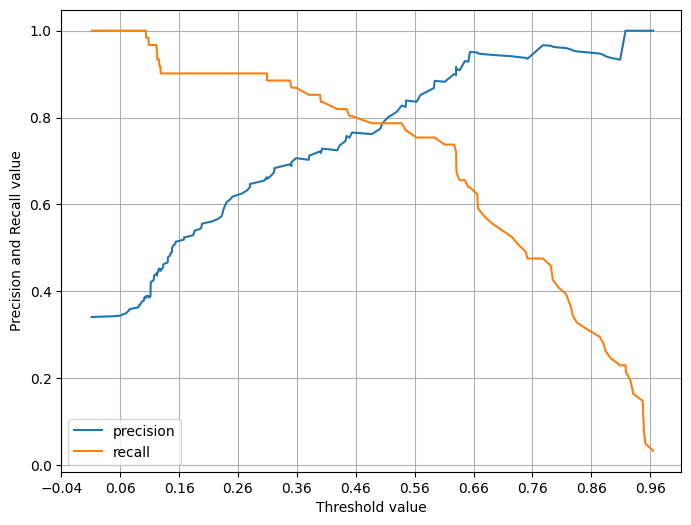

In [29]:
#precision_recall_curv() : 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
  #threshold ndarray 와 이 threshold 에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds= precision_recall_curve(y_test,pred_proba_c1)

  #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='-',label='precision')
  plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

  #threshold 값 X축의 Scale을 0.1 단위로 변경
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  #x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

- 정밀도를 점선으로, 재현율은 실선으로 표현
- 임곗값이 낮을수록 많은 수의 양성 예측으로인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아진다.

# **정밀도와 재현율의 맹점**

<정밀도가 100%가 되는 방법>
- 확실한 기준이 되는 경우만 positive로 예측하고 나머지는 모두 negative로 예측한다

<재현율이 100%가 되는 방법>
- 모든 환자를 positive로 예측한다

=> 정밀도와 재현율 중 하나만 스코어가 좋고 하나는 스코어가 나쁜 분류는 성능이 좋지 않은 분류

# **4. F1 스코어**

- F1 스코어: 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 한쪽으로 치우치지 않는 수치를 나타낼 때 높음

F1= 2/ (1/recall+1/precision) = 2 * (precision*recall)/(precision+recall)

In [30]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
print('F1 스코어: {0:.4f}'.format(f1))


F1 스코어: 0.7805


In [32]:
def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  #F1 스코어 추가
  f1=f1_score(y_test,pred)
  print('오차행렬')
  print(confusion)
  #f1 score print 추가
  print('정확도: {0:.4f},정밀도: {1:.4f},재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy,precision,recall,f1))

  thresholds=[0.4,0.45,0.5,0.55,0.6]
  pred_proba=lr_clf.predict_proba(X_test)
  get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

# **5. ROC 곡선과 AUC**

- 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
- ROC 곡선 : 수신자 판단 곡선
  - RPR 이 변할 때 TPR 이 어떻게 변하는지 나타내는 곡선
  - 가운데 직선에 가까울수록 성능이 떨어지는 것, 멀어질수록 성능이 뛰어난 것

- TPR 곡선 : 재현율을 나타냄(민감도)
  - 민감도에 대응하는 지표: TNR(true negative rate)


- 민감도(TPR) : 실제값 positive 가 정확히 예측돼야하는 수준을 나타냄
- 특이성(TNR) : 실제값 negative가 정확히 예측돼야하는 수준 나타냄

FPR=FP/(FP+TN)=1-TNR=1-특이성


roc_curve() : ROC 곡선 구하기 위한 api
- 입력 파라미터: y_true, y_score
- 반환값: fpr,tpr,thresholds

In [33]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
#반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 step으로 추출
#thresholds[0]은 max (예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index=np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],2))

#5step 단위로 추출된 임계값에 따른 FPR,TPR 값
print('샘플 임곗값별 FPR:',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:',np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


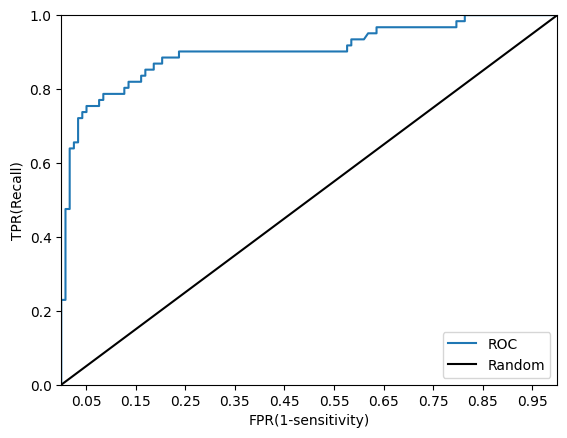

In [35]:
def roc_curve_plot(y_test,pred_proba_c1):
  #임곗값에 따른 FPR,TPR 값을 반환받음
  fprs, tprs, thresholds=roc_curve(y_test,pred_proba_c1)
  #ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs,tprs,label='ROC')
  #가운데 대각선 직선을 그림
  plt.plot([0,1],[0,1],'k-',label='Random')

  #FPR X축의 scale을 0.1단위로 변경, X, Y축 명 설정 등
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test,pred_proba[:,1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
import numpy as np

print(confusion_matrix(y_test,pred))
print('정확도:',np.round(accuracy_score(y_target,preds),4))
print('정밀도:',np.round(precision_score(y_target,preds),4))
print('재현율:',np.round(recall_score(y_target,preds),4))

In [40]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  f1=f1_score(y_test,pred)
  #ROC-AUC 추가
  roc_auc=roc_auc_score(y_test,pred_proba)
  print('오차 행렬')
  print(confusion)
  #ROC-AUC print 추가
  print('정확도: {0:.4f},정밀도:{1:.4f},재현율:{2:.4f},\
  F1:{3:.4f},AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))